In [53]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import itertools
import numpy as np
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

data = pd.DataFrame(pd.read_csv('data.csv'))
data.head()

,COL_1,COL_2,COL_3,COL_4,COL_5,COL_6,COL_7,COL_8,COL_9,COL_10,...,COL_26,COL_27,COL_28,COL_29,COL_30,COL_31,COL_32,COL_33,Quantity,Target
0,-1.171910,7.848397,93.521312,1.392288531,66.417154,0.000000,-5.301708,13.705543,41.076645,-6.058063,...,38.573425,-10.554010,10.641489,57.119862,1.136824,4.636065,10.342069,69.850213,6.008098746,0
1,9.523054,6.500050,-17.752853,0.666903172,34.722696,4.958577,11.771209,45.448412,5.213907,3.962270,...,23.652576,33.680394,49.996511,32.181979,1.017839,88.224999,-7.888449,48.017713,1.989541194,0
2,-30.507817,-35.844867,42.460668,1.780247381,58.090934,0.000000,23.236586,123.926586,42.987727,18.778323,...,-42.635379,-15.867116,-16.993190,-54.414452,1.612964,-53.341829,14.348167,-11.002013,6.936638705,0
3,-63.899072,-66.961934,-28.531696,1.51987552,-27.422829,0.000000,-38.087304,37.111229,33.324104,8.959495,...,-13.044841,-56.311194,-28.054077,-83.399777,0.127208,-78.005307,5.853169,38.401735,5.816241156,0
4,29.528048,-2.859712,35.596559,1.152610914,51.241258,0.000000,-2.432167,10.749448,37.257440,-6.600826,...,38.846838,44.233910,49.247931,73.794600,0.687138,68.812474,48.646178,44.860393,5.248352375,0


In [54]:
# Data Exploration

In [55]:
data.describe()

,COL_1,COL_2,COL_3,COL_5,COL_6,COL_7,COL_8,COL_9,COL_10,COL_11,...,COL_25,COL_26,COL_27,COL_28,COL_29,COL_30,COL_31,COL_32,COL_33,Target
count,2.848070e+05,2.848070e+05,284807.000000,2.848070e+05,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,284807.000000,2.848070e+05,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,-3.765499e-08,5.117895e-08,0.000002,1.029924e-07,1.242875,-5.086307e-07,1.863826e-07,-8.452736e-07,-1.770398e-07,1.299823e-07,...,1.276870e-07,0.000003,-2.553815e-07,0.498862,-0.000005,1.403103,2.402317,-0.000004,-0.000005,0.001727
std,6.826092e+01,5.268134e+01,59.985872,6.673227e+01,3.179767,4.937996e+01,5.976847e+01,3.972766e+01,5.620735e+01,5.003621e+01,...,5.772658e+01,59.086212,4.989501e+01,51.209414,63.798222,0.865594,77.088517,54.032378,62.066016,0.041527
min,-2.343794e+03,-1.105681e+03,-1667.565100,-2.858884e+03,0.000000,-1.389340e+03,-2.160762e+03,-1.616302e+03,-2.309702e+03,-1.269448e+03,...,-6.923148e+02,-1861.137989,-1.232053e+03,-1342.469227,-1928.207356,-0.099986,-2128.509903,-902.929801,-2455.247415,0.000000
25%,-3.023132e+01,-2.738215e+01,-28.497688,-2.521911e+01,0.000000,-2.651937e+01,-2.791230e+01,-1.809421e+01,-1.594229e+01,-2.601255e+01,...,-3.558644e+01,-22.780763,-3.116633e+01,-21.345829,-32.563673,0.655287,-33.087944,-30.381704,-27.946036,0.000000
50%,1.546979e+00,2.992826e+00,2.336904,9.035207e+00,0.000000,-6.944457e-01,2.383864e+00,3.911213e+00,4.636817e+00,7.682701e-03,...,-2.235023e+00,11.068680,4.772275e-01,7.028924,9.086922,1.401301,10.719806,-2.346270,4.737534,0.000000
75%,3.167147e+01,2.837504e+01,32.560453,3.632043e+01,0.058381,2.386864e+01,3.214180e+01,2.182633e+01,2.492407e+01,2.815538e+01,...,3.175607e+01,34.114771,3.061971e+01,31.196418,41.868174,2.153051,50.730176,26.130450,35.942482,0.000000
max,3.994007e+02,7.763747e+02,2598.490594,2.870480e+02,13.298076,5.653825e+02,1.613550e+03,3.733965e+02,5.409829e+02,7.264134e+02,...,1.808420e+03,281.458783,1.911104e+03,696.460312,677.354113,2.899982,216.219432,542.375888,290.485111,1.000000


In [56]:
# How many Fraud Transactions are there?
data['Target'].value_counts()
# Only .17% of transactions are fraud

0    284315
1       492
Name: Target, dtype: int64

In [57]:
# Look for Bad Data
# Variables with Missing Data
data.isnull().any().any()

False

492

In [8]:
# Place Target Column in Separate DataFrame y and Drop Target from data
y = data.Target
data = data.drop(columns = 'Target')

In [9]:
# Assign Column Names to Variable features
features = data.columns

In [10]:
# Convert Dataframe to Float (This identifies what the bad values are)
#data = data.astype(float) UNCOMMENT LATER

In [11]:
# Replace #NUM! with NaN
data[features] = data[features].replace('#NUM!', np.nan)

#Convert Values to Float
data[features] = data[features].astype(float)

In [12]:
# Show Which Columns Have NaN
print(f"Before Filling Nulls (NaN) Mean:\n{data.isnull().sum()}")

Before Filling Nulls (NaN) Mean:
COL_1          0
COL_2          0
COL_3          0
COL_4       3230
COL_5          0
COL_6          0
COL_7          0
COL_8          0
COL_9          0
COL_10         0
COL_11         0
COL_12         0
COL_13         0
COL_14         0
COL_15         0
COL_16         0
COL_17         0
COL_18         0
COL_19         0
COL_20         0
COL_21         0
COL_22         0
COL_23         0
COL_24         0
COL_25         0
COL_26         0
COL_27         0
COL_28         0
COL_29         0
COL_30         0
COL_31         0
COL_32         0
COL_33         0
Quantity    1825
dtype: int64


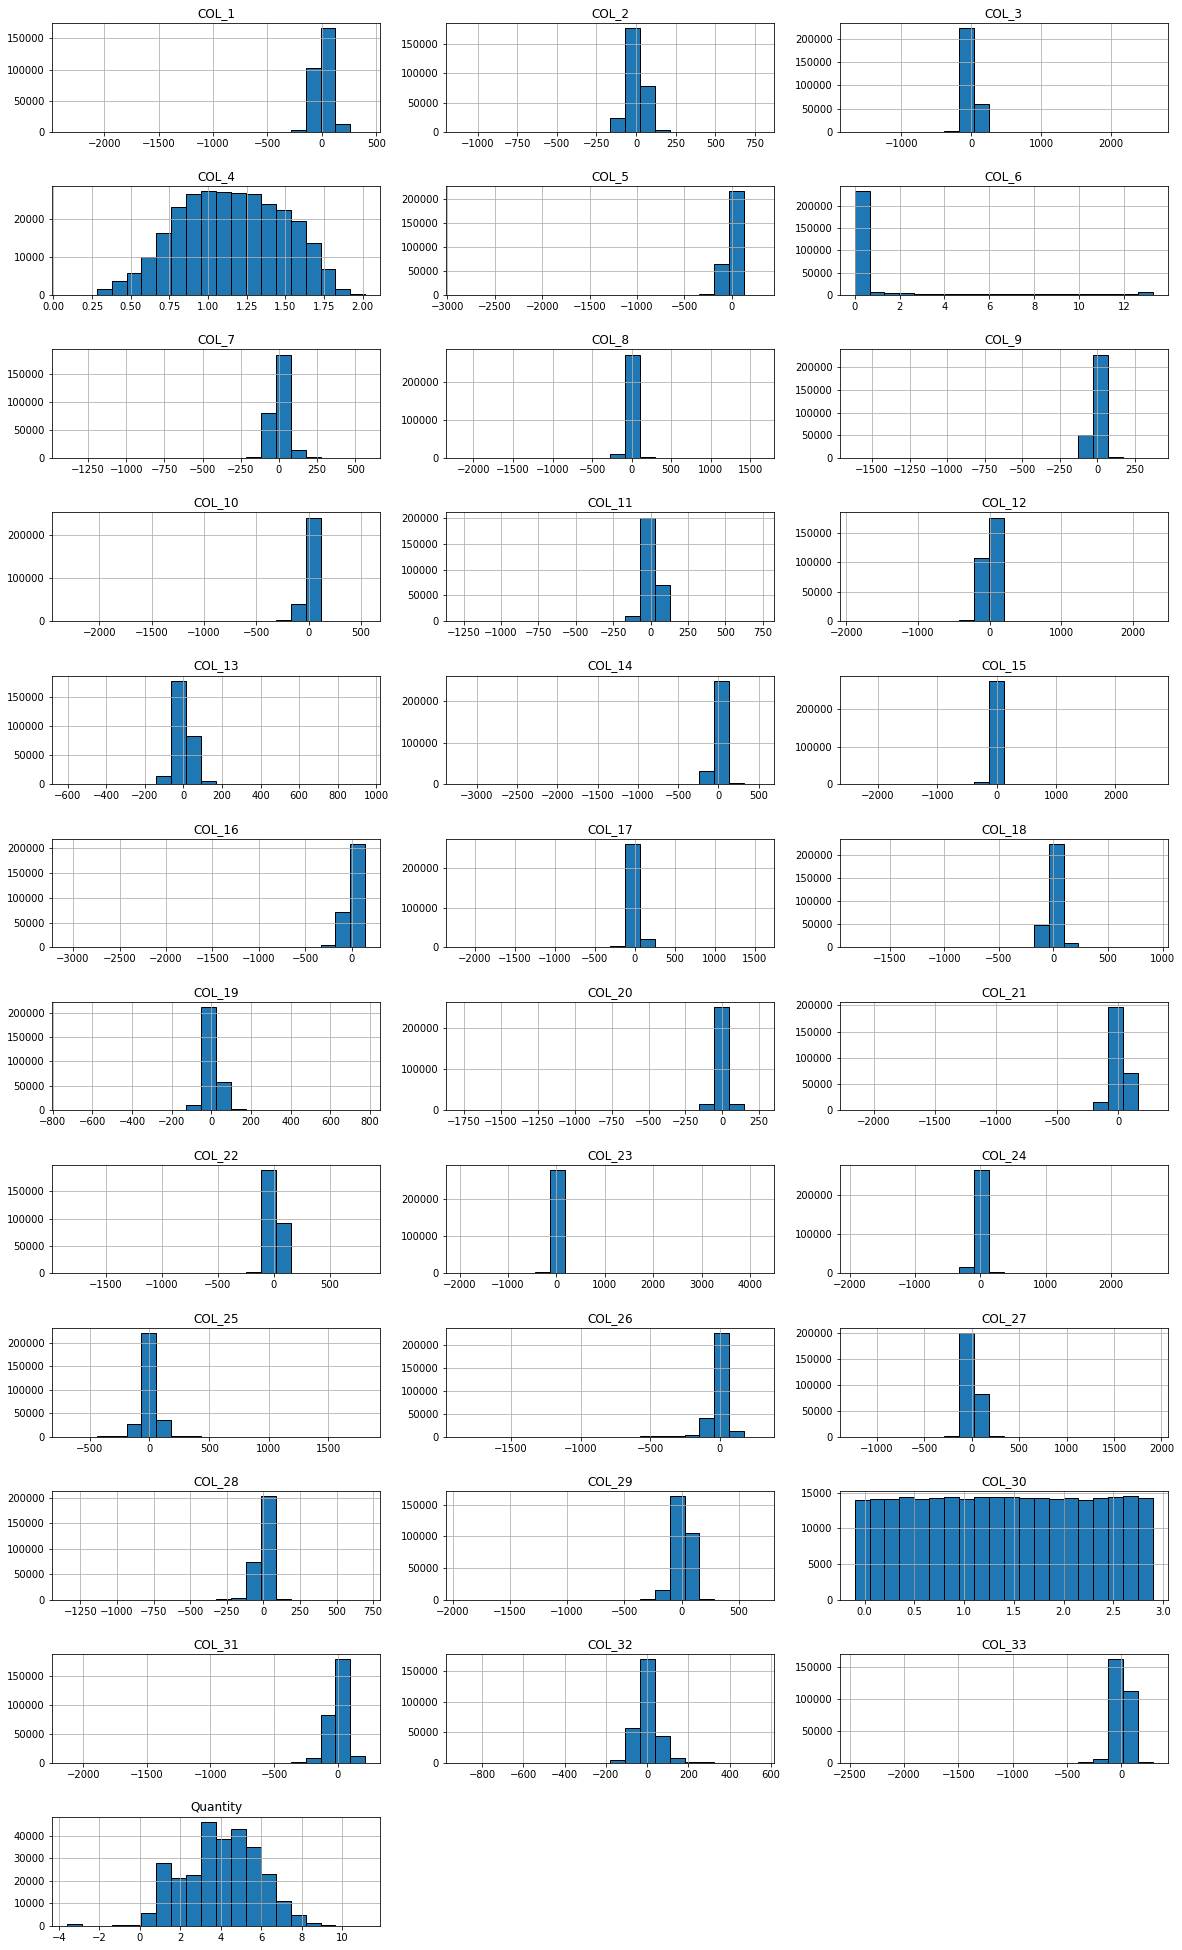

In [13]:
columns=data.columns[:34]
plt.subplots(figsize=(20,50))
length=len(columns)
for i, j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    data[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

# Based off these histograms, COl_4 has outliers. 

In [14]:
# Replace NaN with Average of Column for Col 4
#print(f"Before Filling Nulls (NaN) with Mean for Col_4: {data['COL_4'].isnull().sum()}")
#data['COL_4'].fillna(data['COL_4'].mean(), inplace=True)
#print(f"After Filling Nulls (NaN) with Mean for Col_4: {data['COL_4'].isnull().sum()}")

In [15]:
# Replace Negative Numbers with NaN in Quantity Column
print(f"Before Replacing Negative with NaN: {data['Quantity'][data['Quantity'] < 0].count()}")
data['Quantity'][data['Quantity'] < 0] = np.nan
print(f"After Replacing Negative with NaN: {data['Quantity'][data['Quantity'] < 0].count()}")

Before Replacing Negative with NaN: 1405
After Replacing Negative with NaN: 0


In [16]:
data['Quantity'].isnull().sum()

3230

In [17]:
# Replace NaN in Quantity Column using K Nearest Neighbor 
#y = data.copy()
#y = y.drop(columns = 'COL_4')
#x = data['Quantity'].values
#x = x.reshape(-1, 1)

# print(f"Before Filling Nulls (NaN) Mean:\n{data.isnull().sum()}")
# imputer = KNNImputer(n_neighbors = 5, weights = "uniform")
# imputer.fit_transform(data)
# print(f"Before Filling Nulls (NaN) Mean:\n{data.isnull().sum()}")

# print(f"Before Filling Nulls (NaN) Mean:\n{data.isnull().sum()}")
# imputer = KNNImputer(n_neighbors = 5, weights = "uniform")
# data_as_numpy_array = imputer.fit_transform(data)
# data_with_no_nan = pd.DataFrame(data=data_as_numpy_array, columns=data.columns)
# print(f"After Filling Nulls (NaN) Mean:\n{data_with_no_nan.isnull().sum()}")

#imputer = KNNImputer(n_neighbors = 5, weights = "uniform")
#z = imputer.fit_transform(x, y)
#z

In [18]:
# Replace NaN with Average of Column
print(f"Before Filling Nulls (NaN) with Mean:/n {data.isnull().sum()}")
data.fillna(data.mean(), inplace=True)
print(f"After Filling Nulls (NaN) with Mean for Col_4:/n {data.isnull().sum()}")

Before Filling Nulls (NaN) with Mean:/n COL_1          0
COL_2          0
COL_3          0
COL_4       3230
COL_5          0
COL_6          0
COL_7          0
COL_8          0
COL_9          0
COL_10         0
COL_11         0
COL_12         0
COL_13         0
COL_14         0
COL_15         0
COL_16         0
COL_17         0
COL_18         0
COL_19         0
COL_20         0
COL_21         0
COL_22         0
COL_23         0
COL_24         0
COL_25         0
COL_26         0
COL_27         0
COL_28         0
COL_29         0
COL_30         0
COL_31         0
COL_32         0
COL_33         0
Quantity    3230
dtype: int64
After Filling Nulls (NaN) with Mean for Col_4:/n COL_1       0
COL_2       0
COL_3       0
COL_4       0
COL_5       0
COL_6       0
COL_7       0
COL_8       0
COL_9       0
COL_10      0
COL_11      0
COL_12      0
COL_13      0
COL_14      0
COL_15      0
COL_16      0
COL_17      0
COL_18      0
COL_19      0
COL_20      0
COL_21      0
COL_22      0
COL_23      

In [19]:
# Assign KNN Predictions to Quantity Column
data['Quantity'].isnull().sum()

0

In [20]:
# Assign KNN Predictions to Quantity Column
# print(f"Count NaN Before Filling with KNN: {data['Quantity'].isnull().sum()}")
# data['Quantity'] = pd.DataFrame(z)
# print(f"Count NaN After Filling with KNN: {data['Quantity'].isnull().sum()}")

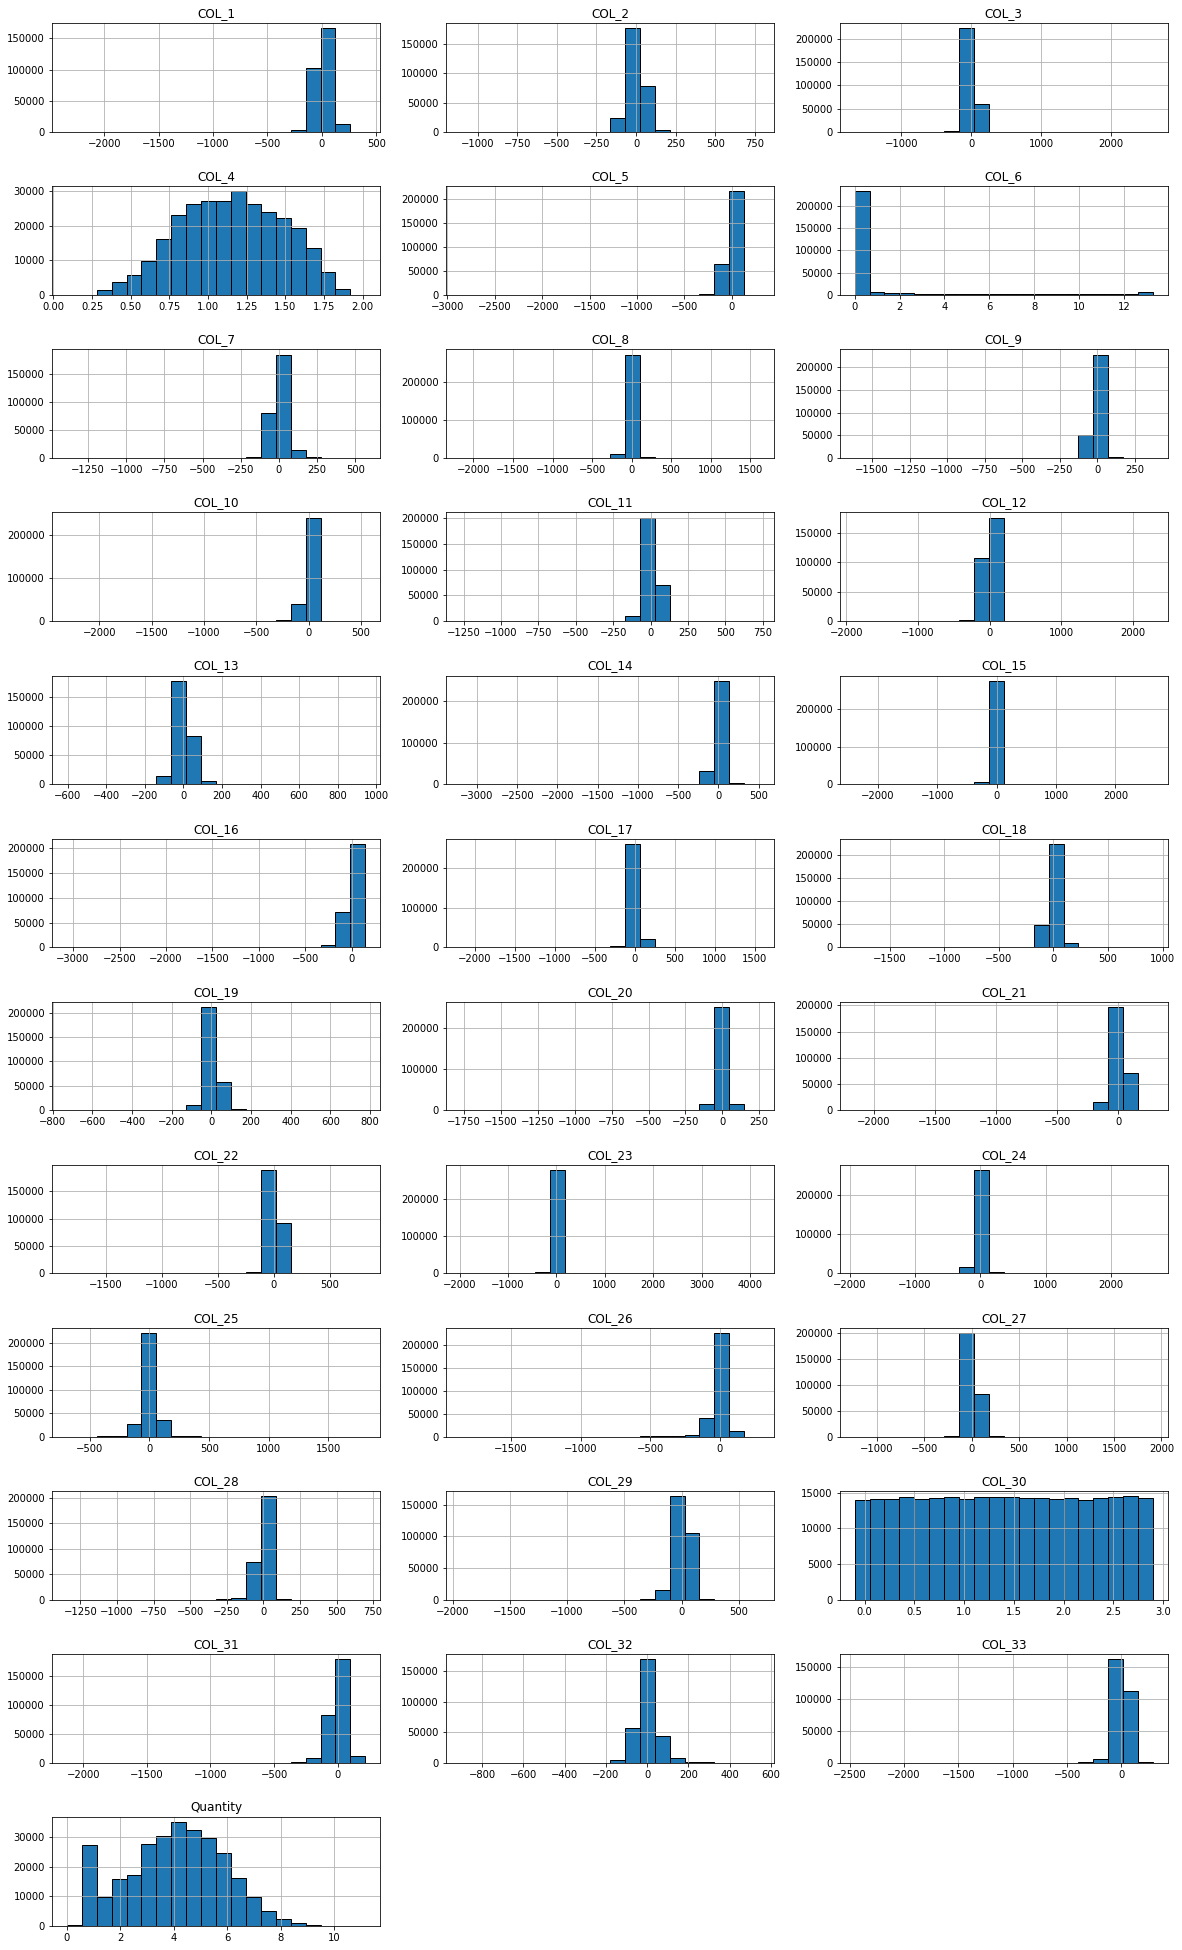

In [21]:
# Run histograms to Verify Replacements
columns=data.columns[:34]
plt.subplots(figsize=(20,50))
length=len(columns)
for i, j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    data[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

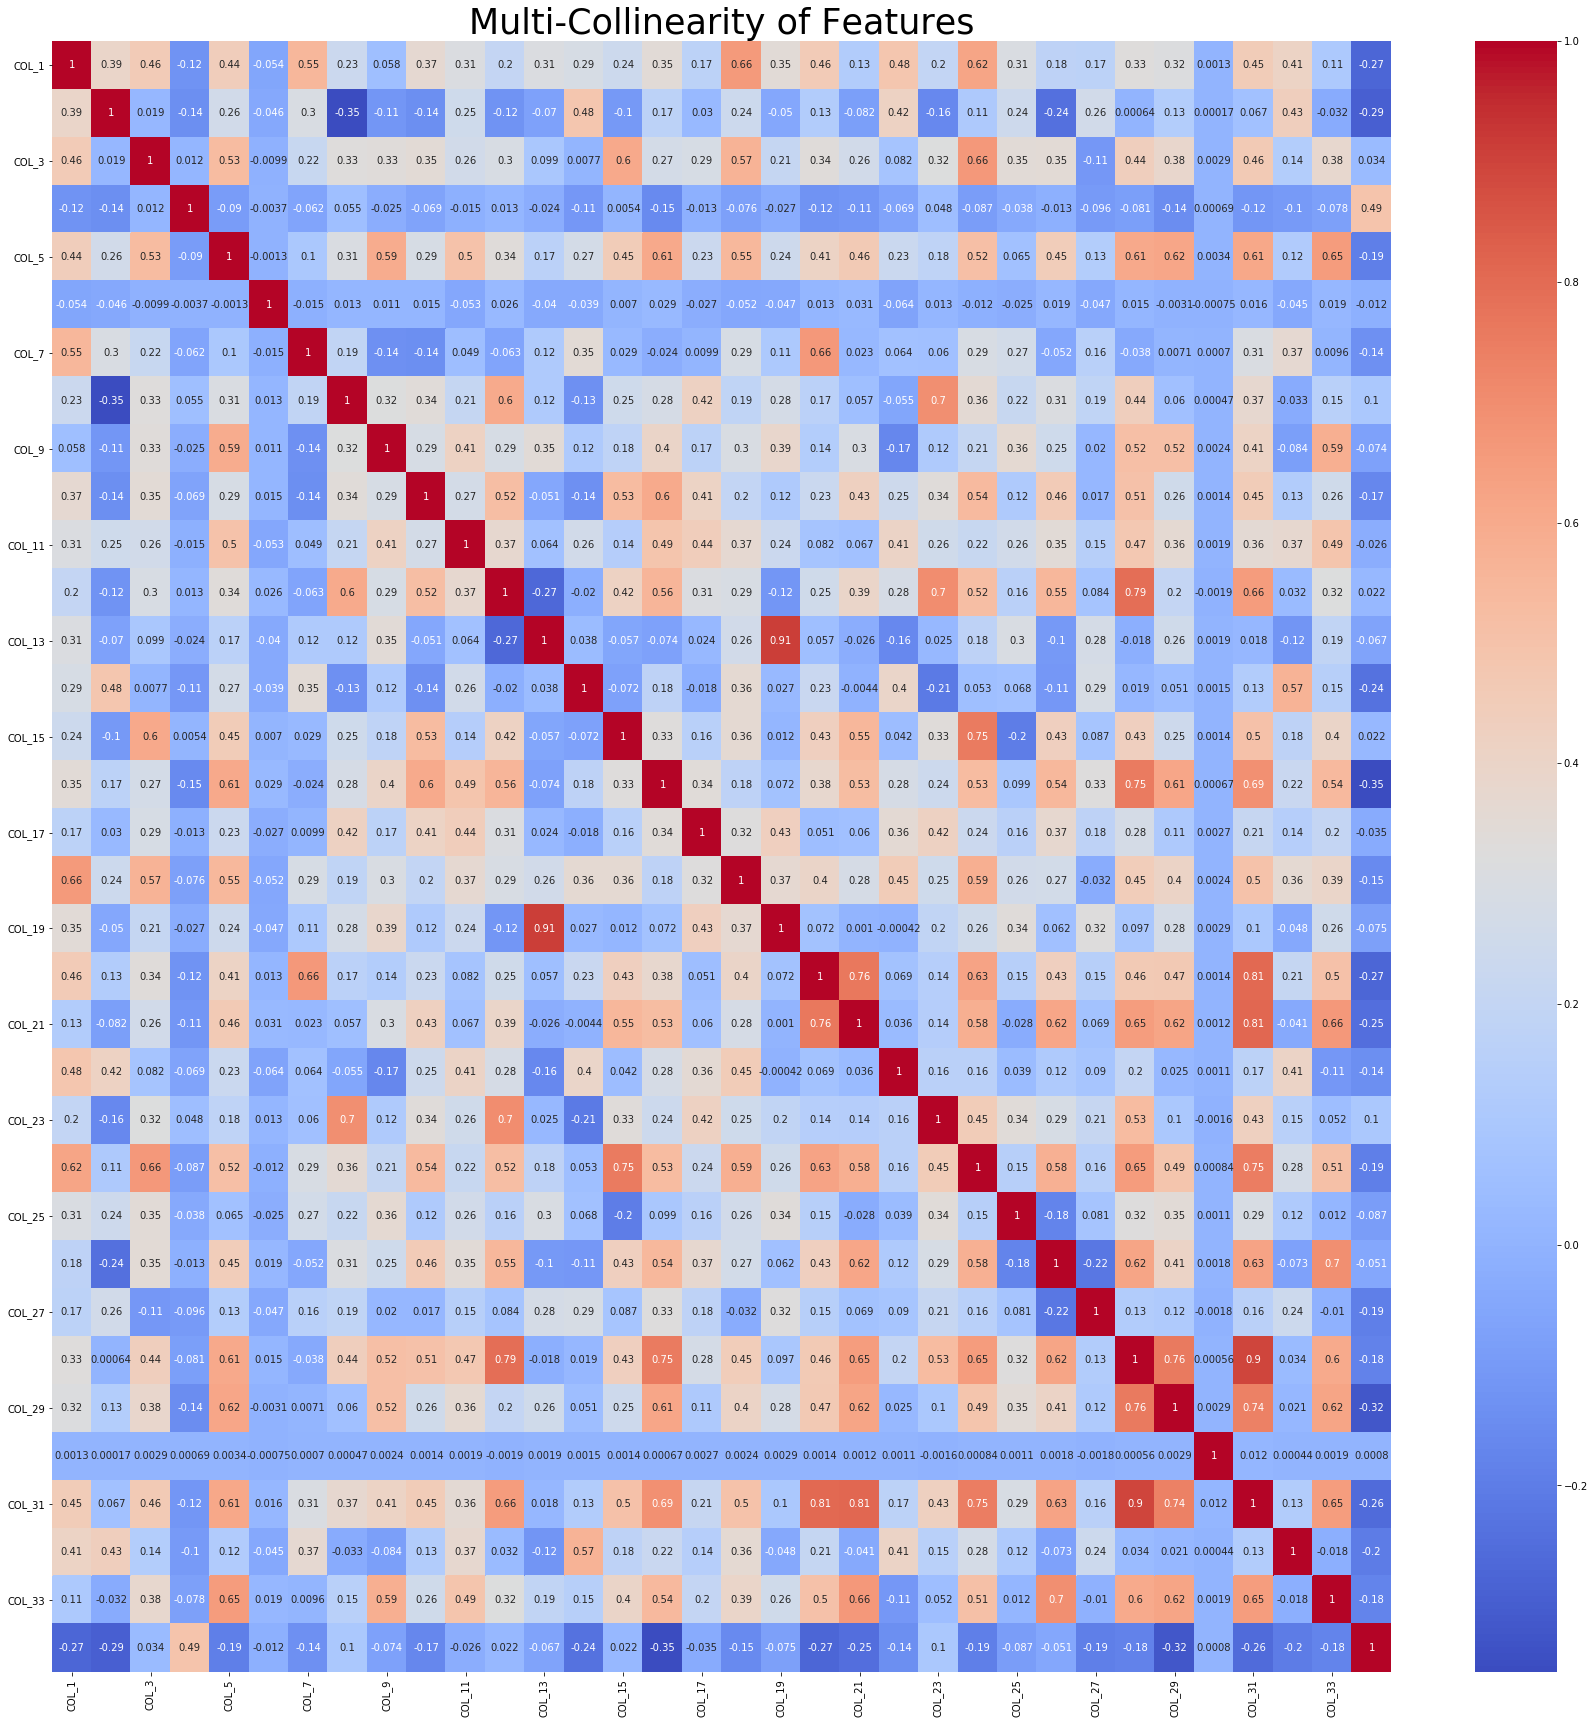

In [22]:
sns.heatmap(data[data.columns[:34]].corr(),annot=True,cmap='coolwarm')
fig=plt.gcf()
fig.set_size_inches(30,30)
plt.title("Multi-Collinearity of Features", fontsize = 35)
plt.show()

# ( >= .75)

In [23]:
corr_matrix = data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]
print('Remove these columns:', to_drop)
data.drop(data[to_drop], axis=1)



Remove these columns: ['COL_19', 'COL_21', 'COL_23', 'COL_24', 'COL_28', 'COL_29', 'COL_31']


,COL_1,COL_2,COL_3,COL_4,COL_5,COL_6,COL_7,COL_8,COL_9,COL_10,...,COL_18,COL_20,COL_22,COL_25,COL_26,COL_27,COL_30,COL_32,COL_33,Quantity
0,-1.171910,7.848397,93.521312,1.392289,66.417154,0.000000,-5.301708,13.705543,41.076645,-6.058063,...,32.148070,-7.245478,-27.774553,50.780666,38.573425,-10.554010,1.136824,10.342069,69.850213,6.008099
1,9.523054,6.500050,-17.752853,0.666903,34.722696,4.958577,11.771209,45.448412,5.213907,3.962270,...,11.043962,36.861772,-39.667775,-1.026036,23.652576,33.680394,1.017839,-7.888449,48.017713,1.989541
2,-30.507817,-35.844867,42.460668,1.780247,58.090934,0.000000,23.236586,123.926586,42.987727,18.778323,...,-20.915244,-37.574254,-79.227028,29.163955,-42.635379,-15.867116,1.612964,14.348167,-11.002013,6.936639
3,-63.899072,-66.961934,-28.531696,1.519876,-27.422829,0.000000,-38.087304,37.111229,33.324104,8.959495,...,-19.944719,-49.529373,-29.348233,16.660380,-13.044841,-56.311194,0.127208,5.853169,38.401735,5.816241
4,29.528048,-2.859712,35.596559,1.152611,51.241258,0.000000,-2.432167,10.749448,37.257440,-6.600826,...,73.504595,17.964696,35.716440,53.602579,38.846838,44.233910,0.687138,48.646178,44.860393,5.248352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,83.298682,276.530218,54.569225,0.509918,33.435253,0.000000,342.812143,-170.242179,-68.251564,-337.277215,...,68.116589,171.553136,11.884913,120.963957,-439.194600,-8.564778,1.741374,228.054893,-227.950200,0.738635
284803,36.844052,-24.320180,-1.222858,1.101540,11.479414,0.000000,16.417438,43.722356,15.374078,26.121972,...,20.499122,-18.706204,-9.625485,85.171505,-31.661847,-15.348870,2.751850,12.622551,-46.691230,4.210440
284804,135.806202,62.783174,29.478867,1.055501,-20.103398,0.000000,66.546340,14.398385,-88.113617,97.515433,...,34.294619,41.267749,101.383013,8.080281,34.618837,-17.300195,2.476143,113.206513,-62.083967,5.217741
284805,37.726231,33.457374,101.999891,1.570297,70.344680,0.000000,20.804226,-32.233635,47.890002,-8.262624,...,54.126890,29.270827,74.141907,66.274847,75.416513,-7.584887,2.684926,61.644356,82.414842,3.302585


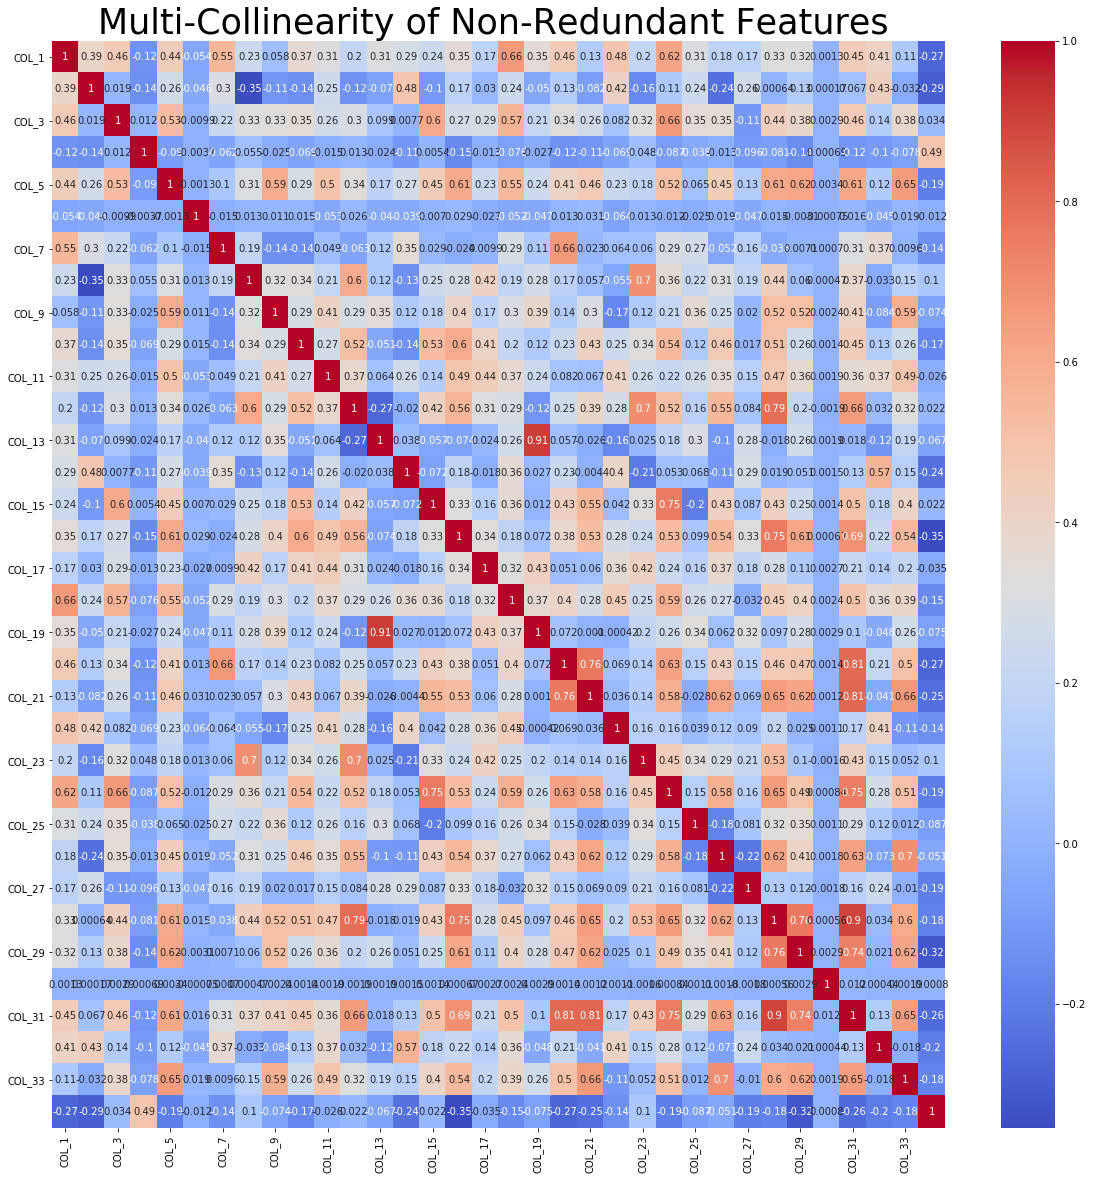

In [24]:
# Verify Removal Highly Correlated Values
sns.heatmap(data[data.columns[:34]].corr(),annot=True,cmap='coolwarm')
fig=plt.gcf()
fig.set_size_inches(20, 20)
plt.title("Multi-Collinearity of Non-Redundant Features ", fontsize = 35)
plt.show()

In [25]:
# Use Standardization to remove the mean and scale to unit variance
# Therefore, 68% of the values will lie between (-1,1)
# Use StandardScaler because we need to transform Quantity so it is close to normally distributed

# StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance
# Unit Variance means dividing all the values by the std dev
# As a result, this results in a distribution with a std dev & variance equal to 1
    # Values.reshape to convert from series to an array
scaler = StandardScaler()
data['Normalized Amount'] = scaler.fit_transform(data['Quantity'].values.reshape(-1,1))
data.drop(['Quantity'], inplace = True, axis = 1)

In [26]:
# Split the Data into Train and Test Datasets
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.3, random_state = 0)

In [27]:
X_train.shape, X_test.shape

((199364, 34), (85443, 34))

In [28]:
# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [29]:
rfc.score(X_test, y_test)

0.9994733330992591

In [30]:
print(accuracy_score(y_test, y_pred.round()))
print(precision_score(y_test, y_pred.round()))
print(recall_score(y_test, y_pred.round()))
print(f1_score(y_test, y_pred.round()))

0.9994733330992591
0.9396551724137931
0.7414965986394558
0.8288973384030419


In [ ]:
#Check Accuracy of Random Forest 
print('RFC Accuracy: ', metrics.accuracy_score(y_test, y_pred))

In [ ]:
# Create Under-Sampling Data Sets
# Under Sampling
# Randomly select the from the Non-Fraud Class to balance with the Fraud Class
fraud_ind = np.array(data[data.Target == 1].index)
len(fraud_ind)

nonfraud_ind = data[data.Target == 0].index

rand_nonfraud_ind = np.random.choice(nonfraud_ind, len(fraud_ind), replace = False)
rand_nonfraud_ind = np.array(rand_nonfraud_ind)

undersample_ind = np.concatenate([fraud_ind, rand_nonfraud_ind])
len(undersample_ind)

undersample_data = data.iloc[undersample_ind, :]


X_undersample = undersample_data.iloc[:, undersample_data.columns != 'Target']
y_undersample = undersample_data.iloc[:, undersample_data.columns == 'Target']

X_train, X_test, y_train, y_test = train_test_split(X_undersample, y_undersample, test_size = 0.3)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
# SMOTE - Synthetic Minority Over Sampling Technnique
# This method duplicates the data in the minority class
# Selects data that are close or similar in the feature space and drawing a line
# between data and makes new data at a point on the line
# The new data are close to the minoirty class in the feature space

X_resample, y_resample = SMOTE().fit_sample(X, y)
X_resample.shape

counter = Counter(y_resample)
print(counter)

X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size = 0.3)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
# Run Feature Importances
importances = rfc.feature_importances_
data_tuples = list(zip(features, importances))
rfcFeatures = pd.DataFrame(data_tuples, columns = ['Feature', 'Weight' ])
rfcFeatures = rfcFeatures.sort_values(by = ['Weight'], ascending = False)

In [ ]:
# Principal Component Analysis
pca = PCA(n_components = 0.95)
pca.fit(data)

In [ ]:
pca.components_

In [ ]:
# Plot Variance Explained by the PCA
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [ ]:
# We went over a number of different ways to try to 'balance' 
# the highly imbalanced data.  Can you try out these techniques?

# Since only .17% of the transactions are fraud, there is a data imbalance
# The model can more easily detect the majority class because of this


In [ ]:


fraud_ind = np.array(data[data.Target == 1].index)
normal_ind = data[data.Target == 0].index
random_normal_ind = np.random.choice(normal_ind, num_frauds, replace = False)
random_normal_ind = np.array(random_normal_ind)
under_sample_data = data.iloc[under_sample_ind, :]
X_undersample = under_sample_data.iloc[:, under_sample_data.columns != '']
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'Target']

In [ ]:
This data was received anonymized – most of the columns are transformations of the original data.
It represents online transactions, some of which where ultimately proven to be fraudulent.
The right-most column is 0 (no fraud) or 1 (fraud).  That is the target column
The quantity column apparently is a transformation of the amount of money involved.
The other columns are the ones that are anonymized – there is no way of regaining the original data.  It is my understanding that no data was actually lost, but rather manipulated so that it is hard to decode the original data.
1.	EXPLORATORY DATA ANALYSIS (DRAFT)
Steps to take (this list will be enlarged over the next few days):
•	Read the data into a pandas dataframe
•	Examine the data for ‘bad’ data, such as missing or indications of null values or such.
•	Plot histograms for all the features.  This is taking each feature and producing a small histogram.  Do it such a way that it looks like a matrix of plots.
•	Look for any outliers in the data, especially the Quantity field.
•	Generate a correlation heat map of the features (see, for example, the simple 2 layer NN notebook we did).
o	Does it appear that there are features that are redundant with other features and can be removed?
•	Run a random forest and look at the feature importances?
•	Run a Principal Component analysis.
o	Plot the ‘variance explained’ by the principal component number.  What do you see?
•	Get the first two principal components, and plot all of the fraud observations and, say, 1000 of the non-fraud ones.  (these should be scatter diagrams with different colors for the two types).
o	Is there a natural clustering that you can see?

What is important to predict?  What tolerance do we have mis-predicting fraud (false negatives).  Are false positives really bad?  Or are false positives just annoying?  Think about your own experiences with your credit card(s).
Given (1), what metric(s) would make sense to try to measure one machine learning approach versus another?
We went over a number of different ways to try to 'balance' the highly imbalanced data.  Can you try out these techniques?
